# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	le1_classes.npy  sample_data  unswtest.csv  unswtrain.csv


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
#import os
#os.chdir("/content/gdrive/My Drive/ASDOS/template/APT/dataset")
#!ls


In [ ]:
# Load datasets
unsw_df = pd.read_csv('/content/unswtrain.csv')
unsw_df = pd.read_csv('/content/unswtest.csv')

# Lihat kolom masing-masing dataset
print("Kolom UNSW:", unsw_df.columns)


Kolom UNSW: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
# Load datasets
unsw_df = pd.read_csv('unswtrain.csv')

# Lihat kolom masing-masing dataset
print("Kolom UNSW:", unsw_df.columns)


Kolom UNSW: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
unsw_df.head(n=5)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
# Memeriksa nilai yang hilang
unsw_df.isnull().sum()


,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode beberapa kolom kategorikal
unsw_df['proto'] = label_encoder.fit_transform(unsw_df['proto'])
unsw_df['state'] = label_encoder.fit_transform(unsw_df['state'])
unsw_df['service'] = label_encoder.fit_transform(unsw_df['service'])
unsw_df['attack_cat'] = label_encoder.fit_transform(unsw_df['attack_cat'])

# Jika ada kolom yang tidak perlu di-encode, Anda bisa melewatkannya.


In [ ]:
# Menentukan fitur (X) dan target (y)
X = unsw_df.drop(['id', 'label', 'attack_cat'], axis=1)  # Fitur (tanpa id, label, attack_cat)
y = unsw_df['label']  # Target (label untuk klasifikasi APT dan Normal)


Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

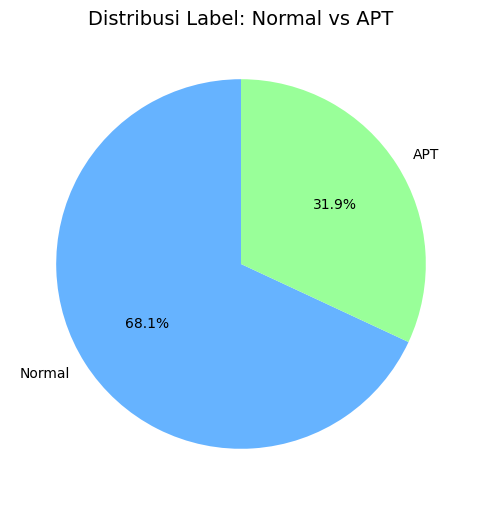

In [ ]:
# Menghitung jumlah masing-masing label
label_counts = unsw_df['label'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Normal', 'APT'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

# Menambahkan judul
plt.title('Distribusi Label: Normal vs APT', fontsize=14)
plt.show()


# **Label Encoding**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(unsw_df.label.map(lambda x:'normal' if x==0 else 'apt'))



In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = unsw_df.copy()
bin_data['label'] = bin_label


In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label


In [ ]:
le1.classes_


array(['apt', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

# **DATA SPLITTING**

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:

X_bin = bin_data.drop(columns=['label'],axis=1)
y_bin = bin_data['label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


In [ ]:
# Menampilkan jumlah data pada masing-masing subset
print("Jumlah data training (X_train_bin):", X_train_bin.shape[0])
print("Jumlah data testing (X_test_bin):", X_test_bin.shape[0])
print("Jumlah label training (y_train_bin):", y_train_bin.shape[0])
print("Jumlah label testing (y_test_bin):", y_test_bin.shape[0])


Jumlah data training (X_train_bin): 140272
Jumlah data testing (X_test_bin): 35069
Jumlah label training (y_train_bin): 140272
Jumlah label testing (y_test_bin): 35069


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


#ImprovedTbDetector#

In [ ]:
class ImprovedTbDetector(nn.Module):
    def __init__(self, input_dim, num_classes, d_model, nhead, num_layers, dropout):
        super(ImprovedTbDetector, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, 100, d_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc1 = nn.Linear(d_model, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = x + self.positional_encoding[:, :x.size(1), :]
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# **2. TRANSFORMER "Tabular (TAB)"**

# **CLASSIFICATION Non-Tuning**

In [ ]:
!pip install pytorch-tabular


Fold 1
Accuracy for fold 1: 99.48%
F1 Score for fold 1: 0.9948
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     28000
           1       1.00      0.99      1.00     59671

    accuracy                           0.99     87671
   macro avg       0.99      1.00      0.99     87671
weighted avg       0.99      0.99      0.99     87671



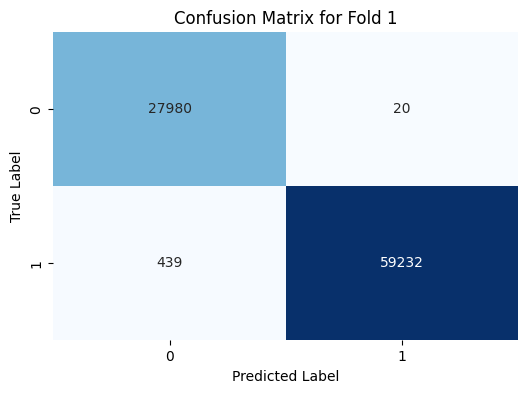

Fold 2
Accuracy for fold 2: 99.92%
F1 Score for fold 2: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28000
           1       1.00      1.00      1.00     59670

    accuracy                           1.00     87670
   macro avg       1.00      1.00      1.00     87670
weighted avg       1.00      1.00      1.00     87670



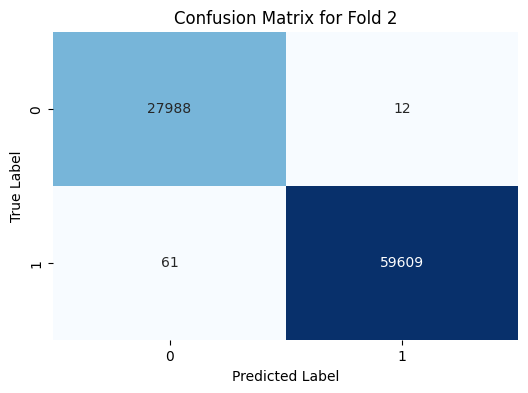

Average Accuracy: 99.70%
Average F1 Score: 0.9970


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Label Encoding
# Label Encoding untuk kolom 'Label'
label_encoder = LabelEncoder()
unsw_df['Label_encoded'] = label_encoder.fit_transform(unsw_df['label'])
# Convert class_names to a list of strings
class_names = [str(name) for name in label_encoder.classes_]

# Gabungkan fitur dan label untuk proses k-fold
combined_df = unsw_df.drop(columns=['label'])  # Menghilangkan kolom 'label', gunakan Label_encoded

# 2. Define Tab Transformer Model
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=2, shuffle=True, random_state=50)  # Gunakan K-Fold untuk cross-validation
all_accuracy, all_f1_scores = [], []
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(combined_df)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = combined_df.drop(columns=['Label_encoded']).iloc[train_index], \
                     combined_df.drop(columns=['Label_encoded']).iloc[val_index]
    y_train, y_val = combined_df['Label_encoded'].iloc[train_index], combined_df['Label_encoded'].iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Initialize model, loss, and optimizer
    model = TabTransformer(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    best_loss = float('inf')  # Initialize best_loss for early stopping
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 1  # Set to 20 untuk eksperimen penuh
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Early stopping based on validation loss
        if avg_loss < best_loss:  # Monitor loss untuk early stopping
            best_loss = avg_loss
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    all_accuracy.append(accuracy)
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val, y_pred.numpy(), target_names=class_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')


# **Hyperparameter Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Dummy data (gantikan ini dengan data asli Anda)
# Pastikan data asli Anda memiliki kolom 'Label' dan fitur lainnya
data = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'feature3': np.random.rand(1000),
    'Label': np.random.choice(['Class1', 'Class2'], size=1000)
})

# Label Encoding
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = list(label_encoder.classes_)

# Wrapper for the TabTransformer model
class TabTransformerSklearn(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2, lr=0.001, batch_size=16):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.d_model = d_model
        self.nhead = nhead
        self.num_layers = num_layers
        self.lr = lr
        self.batch_size = batch_size
        self.model = None
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Scale the features
        X_scaled = self.scaler.fit_transform(X)

        # Convert to PyTorch tensors
        X_tensor = torch.FloatTensor(X_scaled)
        y_tensor = torch.LongTensor(y.values)

        # Create DataLoader
        train_dataset = TensorDataset(X_tensor, y_tensor)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        # Initialize model, loss, and optimizer
        self.model = TabTransformer(input_dim=self.input_dim, num_classes=self.num_classes,
                                     d_model=self.d_model, nhead=self.nhead, num_layers=self.num_layers)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        # Train the model
        num_epochs = 20
        for epoch in range(num_epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

    def predict(self, X):
        # Scale the features
        X_scaled = self.scaler.transform(X)
        X_tensor = torch.FloatTensor(X_scaled)

        self.model.eval()
        with torch.no_grad():
            y_pred_probs = self.model(X_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)
        return y_pred.numpy()

# Define the hyperparameter grid
param_grid = {
    'd_model': [32, 64],
    'nhead': [2, 4],
    'num_layers': [1, 2],
    'lr': [0.001, 0.01],
    'batch_size': [16, 32]
}

# Prepare the data
X = data.drop(columns=['Label', 'Label_encoded'])
y = data['Label_encoded']

# Create an instance of the model wrapper
model_wrapper = TabTransformerSklearn(input_dim=X.shape[1], num_classes=len(class_names))

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid,
                           scoring='f1_weighted', cv=10, verbose=1, n_jobs=-1)

# Run the grid search
grid_search.fit(X, y)

# Output the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated F1 score: {grid_search.best_score_:.4f}")


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters: {'batch_size': 16, 'd_model': 32, 'lr': 0.001, 'nhead': 4, 'num_layers': 1}
Best cross-validated F1 score: 0.5205


# **CLASSIFICATION With Hyperparameter Tuning**


Fold 1
Accuracy for fold 1: 99.87%
F1 Score for fold 1: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11068
           1       1.00      1.00      1.00     24001

    accuracy                           1.00     35069
   macro avg       1.00      1.00      1.00     35069
weighted avg       1.00      1.00      1.00     35069



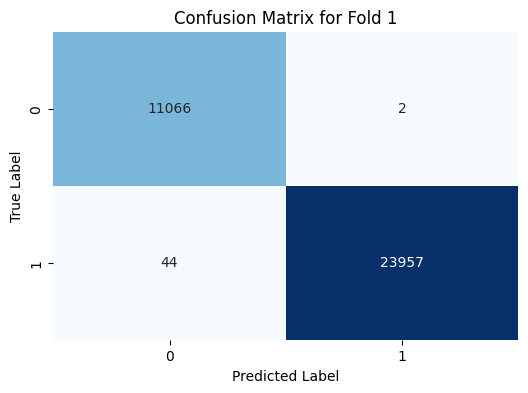

Fold 2
Early stopping triggered at epoch 14
Accuracy for fold 2: 99.99%
F1 Score for fold 2: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11269
           1       1.00      1.00      1.00     23799

    accuracy                           1.00     35068
   macro avg       1.00      1.00      1.00     35068
weighted avg       1.00      1.00      1.00     35068



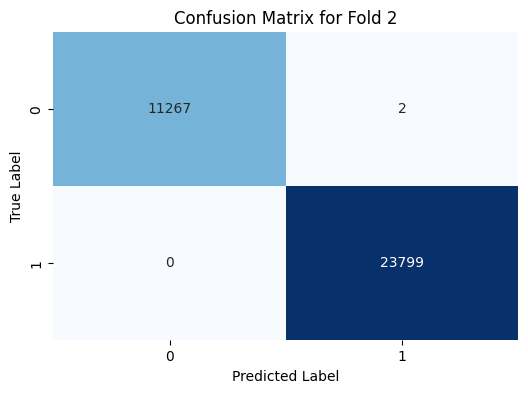

Fold 3
Early stopping triggered at epoch 17
Accuracy for fold 3: 99.99%
F1 Score for fold 3: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11293
           1       1.00      1.00      1.00     23775

    accuracy                           1.00     35068
   macro avg       1.00      1.00      1.00     35068
weighted avg       1.00      1.00      1.00     35068



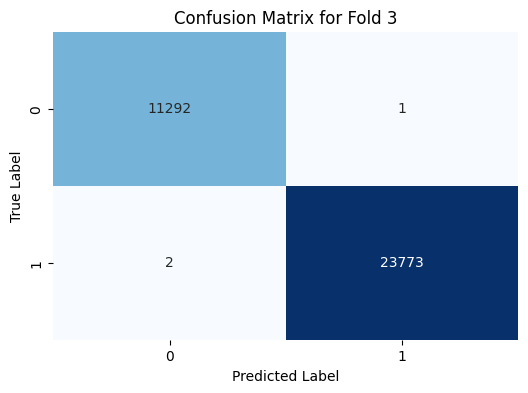

Fold 4
Accuracy for fold 4: 99.98%
F1 Score for fold 4: 0.9998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11125
           1       1.00      1.00      1.00     23943

    accuracy                           1.00     35068
   macro avg       1.00      1.00      1.00     35068
weighted avg       1.00      1.00      1.00     35068



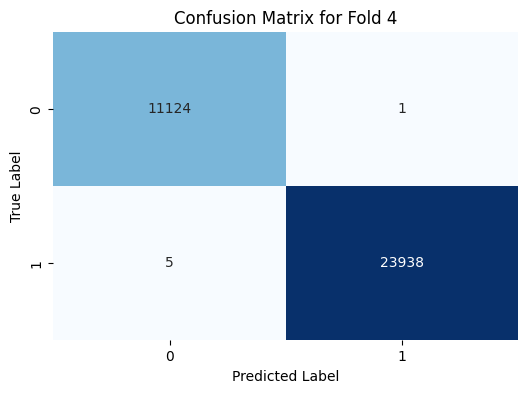

Fold 5
Accuracy for fold 5: 100.00%
F1 Score for fold 5: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11245
           1       1.00      1.00      1.00     23823

    accuracy                           1.00     35068
   macro avg       1.00      1.00      1.00     35068
weighted avg       1.00      1.00      1.00     35068



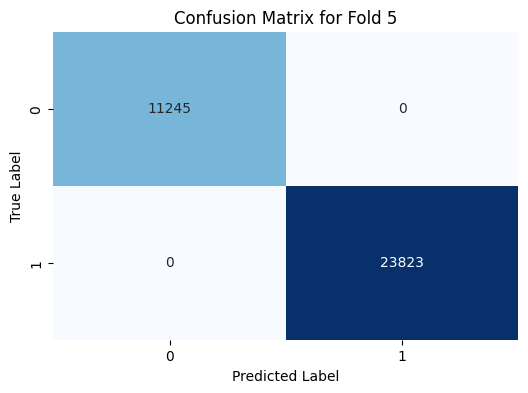

Average Accuracy: 99.97%
Average F1 Score: 0.9997


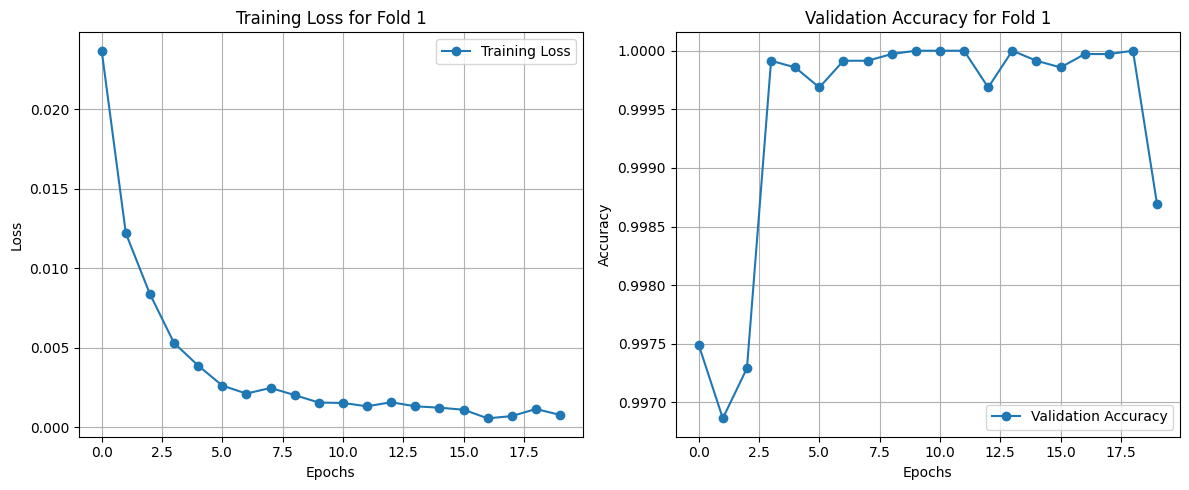

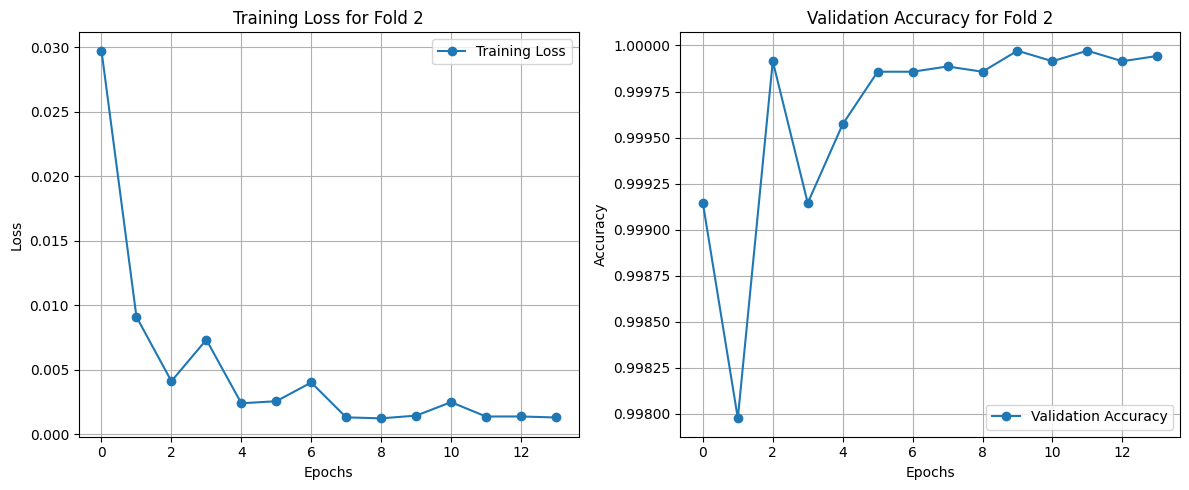

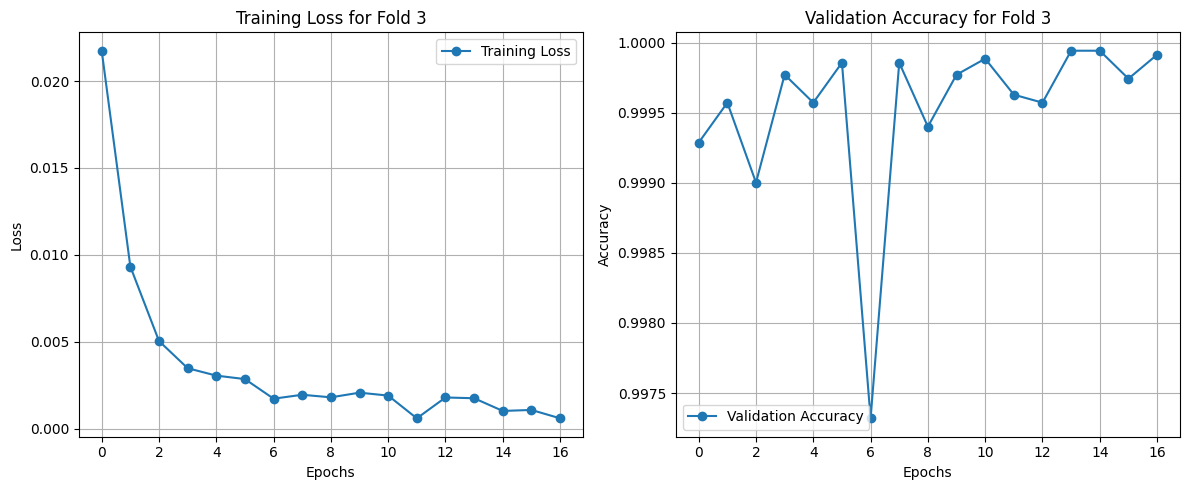

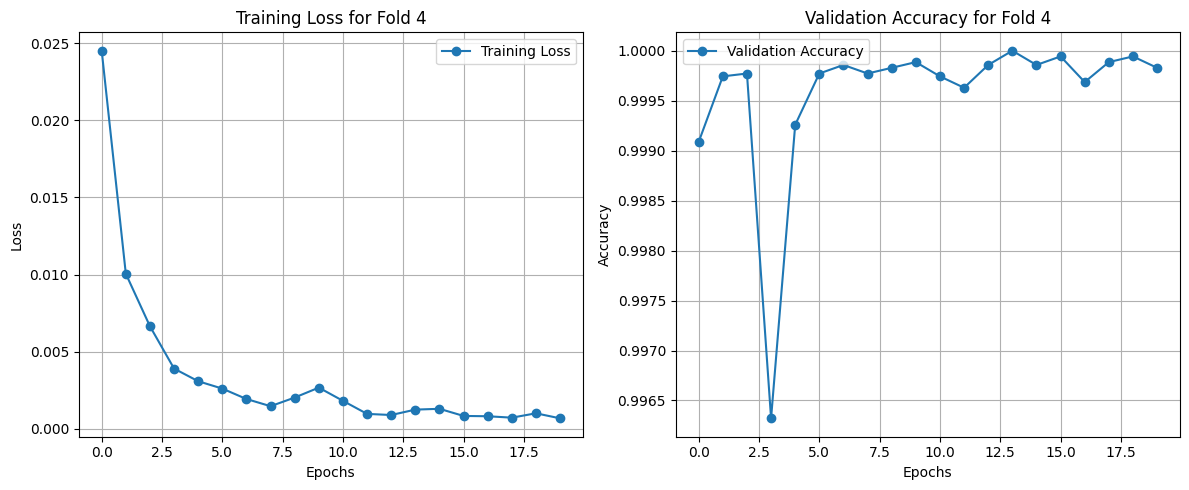

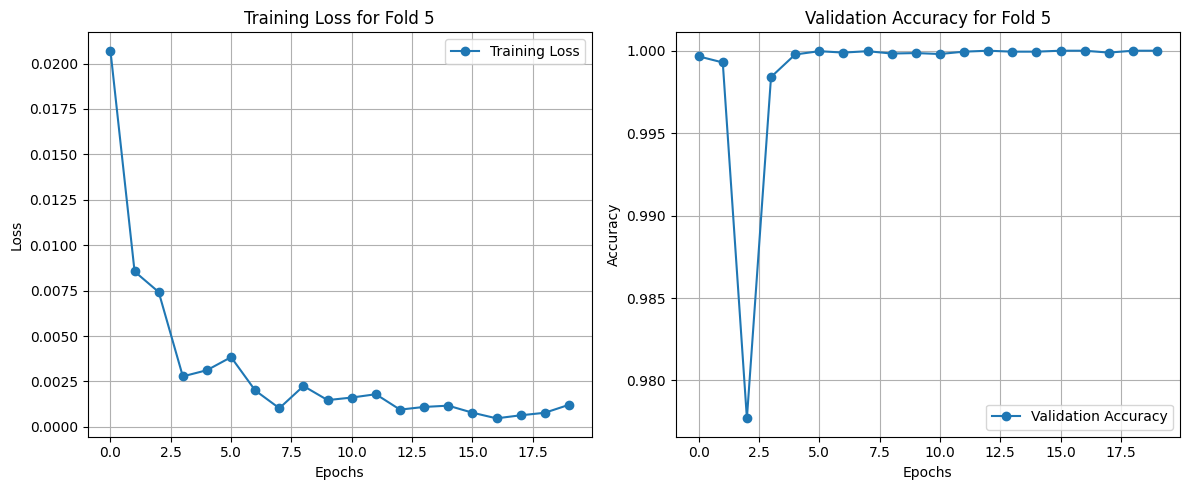

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Label Encoding
# Label Encoding untuk kolom 'Label'
label_encoder = LabelEncoder()
unsw_df['Label_encoded'] = label_encoder.fit_transform(unsw_df['label'])
# Convert class_names to a list of strings
class_names = [str(name) for name in label_encoder.classes_]

# 2. Define Tab Transformer Model
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)  # 10 untuk K-Fold di tubes
all_accuracy, all_f1_scores = [], []
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(unsw_df)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = unsw_df.drop(columns=['label', 'Label_encoded']).iloc[train_index], \
                     unsw_df.drop(columns=['label', 'Label_encoded']).iloc[val_index]
    y_train, y_val = unsw_df['Label_encoded'].iloc[train_index], unsw_df['Label_encoded'].iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Initialize model, loss, and optimizer
    model = TabTransformer(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    best_loss = float('inf')  # Initialize best_loss for early stopping
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20 # Set to 20 for better training tubes
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Early stopping based on validation loss
        if avg_loss < best_loss:  # Monitor loss for early stopping
            best_loss = avg_loss
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    all_accuracy.append(accuracy)
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val, y_pred.numpy(), target_names=class_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
